# Dataset visualization

Visualize the dataset

## Preprocess and load data

In [2]:
import datetime
import io
import os
import pickle

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

from torchvision import transforms
from PIL import Image
from sklearn.model_selection import train_test_split

import torchvision.models as models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from src.data.preprocess_data import DatasetManager

# S3 bucket
import boto3
from dotenv import dotenv_values

Define constants to be used later. *DRIVE_PATH* and *MODEL_PATH* should be the root path of project and path for models, respectively

In [4]:
EMOTION_LIST = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
MODEL_PATH = "../models/"

# Set values
BATCH_SIZE = 8
VAL_SIZE = 0.2
TEST_SIZE = 0.2
N_EPOCHS = 100
INPUT_SIZE = 224
N_FEATURES = len(EMOTION_LIST)

Load all of the data

In [5]:
dataset_manager = DatasetManager(batch_size=BATCH_SIZE, test_size=TEST_SIZE, 
                        validation_size=VAL_SIZE, transform=None, 
                        test_transform=None)
data = dataset_manager.load_dataloaders(return_raw_data=True)

In [26]:
X_train, X_test, X_val = [x[1] for x in data['X'].items()]
y_train, y_test, y_val = [x[1] for x in data['y'].items()]
X_all = np.vstack([X_train, X_test, X_val])
y_all = np.vstack([y_train[:, None], y_test[:, None], y_val[:, None]]).squeeze()

## Visualize data distribution

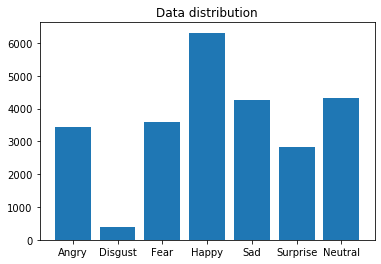

In [40]:
y_hist = np.histogram(y_all, bins=N_FEATURES)[0]
plt.title("Data distribution")
plt.bar(EMOTION_LIST, y_hist)
plt.savefig('../reports/figures/full_data_distribution.png')

It seems that data is quite highly imbalanced. Class disgust has very few instances. Let's take sample images from the classes.

In [43]:
class_indices = [np.where(y_all == i)[0][0] for i in range(N_FEATURES)]

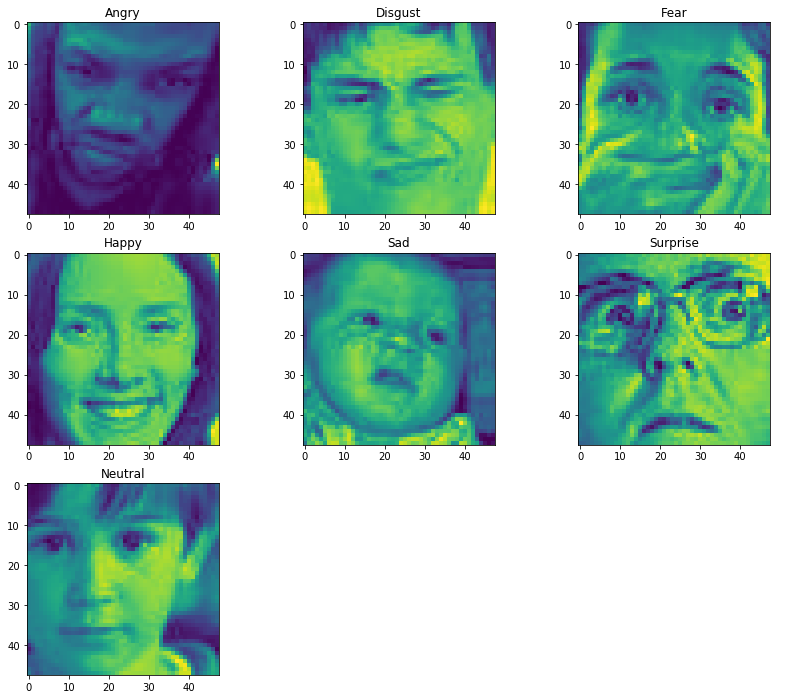

In [53]:
fig, ax = plt.subplots(3, 3, figsize=(14,12))
i = 0
j = 0
for category, indice in enumerate(class_indices):
    ax[i, j].set_title(EMOTION_LIST[category])
    ax[i, j].imshow(X_all[indice])
    
    if j < 2:
        j += 1
    else:
        i += 1
        j = 0
        
ax[2,1].set_axis_off()
ax[2,2].set_axis_off()
plt.savefig('../reports/figures/emotion_samples.png')